# Testing the new version of `pbcpy`

write simple tests here, that will be then implemented in the proper unit tests


In [2]:
import numpy as np
import sys
if "../src/" not in sys.path:
    sys.path.insert(0,"../src/")
from pbcpy.base import DirectCell, ReciprocalCell, Coord
from pbcpy.grid import DirectGrid, ReciprocalGrid
from pbcpy.field import DirectField, ReciprocalField

import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
at1 = np.identity(3)*10
cell1 = DirectCell(lattice=at1, origin=[0,0,0], units="Angstrom") # 10A cubic cell

WARN


In [3]:
cell1.lattice

array([[ 10.,   0.,   0.],
       [  0.,  10.,   0.],
       [  0.,   0.,  10.]])

In [44]:
cell1.volume

6748.3345034684608

In [45]:
rcell = cell1.get_reciprocal()

In [46]:
rcell.lattice

array([[ 0.17594711,  0.        ,  0.        ],
       [ 0.        ,  0.17594711,  0.        ],
       [ 0.        ,  0.        ,  0.17594711]])

In [47]:
dcell = rcell.get_direct()

In [48]:
print(dcell==cell1)

False


In [49]:
type(cell1), type(dcell)

(pbcpy.base.DirectCell, pbcpy.base.DirectCell)

In [50]:
dcell.lattice

array([[ 1.7093731,  0.       ,  0.       ],
       [ 0.       ,  1.7093731,  0.       ],
       [ 0.       ,  0.       ,  1.7093731]])

In [52]:
all(cell1.lattice==at1)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [62]:
at1 = np.identity(3)*10
cell1 = DirectGrid(lattice=at1, origin=[0,0,0], nr=[8,8,8]) # 10A cubic cell

In [63]:
cell1.r[0,0,1,:]

Coord([ 0.  ,  0.  ,  1.25])

In [64]:
reciprocal = cell1.get_reciprocal()

In [66]:
g = reciprocal.g

In [69]:
gg=np.einsum("ijkl,ijkl->ijk",g,g)

In [4]:
gg[0,0,1], g[0,0,1,:], 0.125**2

NameError: name 'gg' is not defined

In [2]:
from pbcpy.formats.qepp import PP

In [3]:
water_dimer = PP(filepp="../tests/density_ks.pp").read()

In [15]:
grad_rho = water_dimer.field.gradient()

In [4]:
rho_g = water_dimer.field.fft()

In [7]:
rho_g.grid.g[...,2].shape

(125, 125, 125)

In [16]:
(rho_g.grid.g[...,1]*rho_g[...,0]).shape

(125, 125, 125)

In [19]:
grad_rho[0,0,0,:]

DirectField([  5.68148369e-09 -4.00045076e-20j,
         6.50807566e-09 +3.69049347e-20j,  -2.13940650e-09 -9.44503377e-20j])

In [23]:
np.einsum("ijkl,ijkl->ijk", grad_rho, grad_rho)

array([[[  7.92113659e-17 +4.29925634e-28j,
           1.04802086e-16 +5.74256797e-28j,
           1.57152380e-17 +1.67707989e-27j, ...,
           5.44635173e-18 +1.64776650e-28j,
           4.65413875e-17 +1.17486715e-27j,
           4.95221381e-17 +1.23125247e-27j],
        [  8.45648774e-17 -8.85691174e-28j,
           2.46828133e-17 -1.26708842e-27j,
           3.28767194e-17 +5.37645124e-28j, ...,
           1.93323826e-18 -2.32899443e-28j,
           3.64930530e-17 -1.22271578e-27j,
           1.25823357e-17 +2.13431067e-27j],
        [  1.93515827e-17 -1.68029924e-27j,
           2.84349251e-17 -2.24332751e-27j,
           4.55533935e-17 -5.20513891e-28j, ...,
           3.71234651e-17 +1.69486923e-27j,
           3.52009487e-17 +1.47691283e-27j,
           6.44189830e-17 +1.19066060e-28j],
        ..., 
        [  4.79447347e-17 +9.28211541e-27j,
           5.15391184e-17 +7.01074454e-27j,
           1.35525184e-16 -3.79754103e-27j, ...,
           7.63571832e-17 -4.42112541e-

In [5]:
water_dimer.field.sigma()

DirectField([[[  7.92113659e-17 +4.29925634e-28j,
           1.04802086e-16 +5.74256797e-28j,
           1.57152380e-17 +1.67707989e-27j, ...,
           5.44635173e-18 +1.64776650e-28j,
           4.65413875e-17 +1.17486715e-27j,
           4.95221381e-17 +1.23125247e-27j],
        [  8.45648774e-17 -8.85691174e-28j,
           2.46828133e-17 -1.26708842e-27j,
           3.28767194e-17 +5.37645124e-28j, ...,
           1.93323826e-18 -2.32899443e-28j,
           3.64930530e-17 -1.22271578e-27j,
           1.25823357e-17 +2.13431067e-27j],
        [  1.93515827e-17 -1.68029924e-27j,
           2.84349251e-17 -2.24332751e-27j,
           4.55533935e-17 -5.20513891e-28j, ...,
           3.71234651e-17 +1.69486923e-27j,
           3.52009487e-17 +1.47691283e-27j,
           6.44189830e-17 +1.19066060e-28j],
        ..., 
        [  4.79447347e-17 +9.28211541e-27j,
           5.15391184e-17 +7.01074454e-27j,
           1.35525184e-16 -3.79754103e-27j, ...,
           7.63571832e-17 -4.4211

In [95]:
n = 180
nr = n,n,n
m = 1
griddata_3d = np.zeros(nr,dtype=float)
for i in range(n):
    theta = m*2*np.pi*i/n
    val = np.sin(theta)
    griddata_3d[i,:,:] = val
grid = DirectGrid(lattice=np.identity(3)*2*np.pi,nr=(n,n,n),)
rho = DirectField(grid=grid, griddata_3d=griddata_3d)
gradrho = rho.gradient()
sigmarho = rho.sigma()

/home/alessandro/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


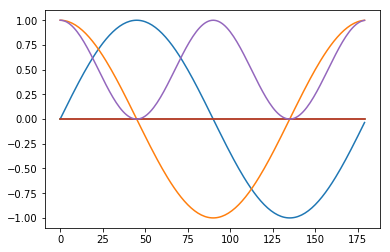

In [96]:
gradrho[:,0,0,:]
plt.plot(rho[:,0,0,0])
plt.plot((n/m)*gradrho[:,0,0,0])
plt.plot((n/m)*gradrho[:,0,0,1])
plt.plot((n/m)*gradrho[:,0,0,2])
plt.plot((n/m)**2*sigmarho[:,0,0])

In [42]:
sigma = np.einsum("ijkl,ijkl->ijk", gradrho.real, gradrho.real)
sigma.shape

(100, 100, 100)

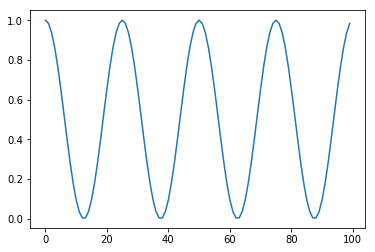

In [47]:
plt.plot(2500*sigma[:,0,0])

In [37]:
A = np.ones((10,5,3))
A

array([[[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]],

       [[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]],

       [[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]],

       [[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]],

       [[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]],

       [[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]],

       [[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]],

       [[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1

In [38]:
np.einsum("ijk,ijk->ij", A,2*A)

array([[ 6.,  6.,  6.,  6.,  6.],
       [ 6.,  6.,  6.,  6.,  6.],
       [ 6.,  6.,  6.,  6.,  6.],
       [ 6.,  6.,  6.,  6.,  6.],
       [ 6.,  6.,  6.,  6.,  6.],
       [ 6.,  6.,  6.,  6.,  6.],
       [ 6.,  6.,  6.,  6.,  6.],
       [ 6.,  6.,  6.,  6.,  6.],
       [ 6.,  6.,  6.,  6.,  6.],
       [ 6.,  6.,  6.,  6.,  6.]])